# Predicting Loan Default: Feature Engineering, Selection, and Training


### Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, aucimport gc
from sklearn.preprocessing import LabelEncoder

In [78]:
train_df=pd.read_csv("train2.csv")
train_df

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,PREVAPP_CREDIT_MEAN,PREVAPP_ANNUITY_MEAN,PREVAPP_CNT_PAYMENT_MAX,PREVAPP_COUNT,AMT_INSTALMENT_TO_NUM_INSTALMENT,TOTAL_INSTALMENT,CC_BALANCE_MEAN,CC_BALANCE_MAX,POS_MONTHS_BALANCE_MIN,POS_COUNT
0,100002,1,0.0,1.0,0.0,0.764465,0.512542,0.626346,0.519580,0.25,...,0.594999,0.546043,0.958333,1.0,26757.458526,5.221590,0.00000,0.00000,0.944408,19.0
1,100003,0,0.0,0.0,0.0,0.894520,0.910094,0.763152,0.929850,0.75,...,0.732362,0.821713,0.458333,3.0,97324.142466,5.326102,0.00000,0.00000,0.596914,28.0
2,100004,0,1.0,1.0,0.0,0.323845,0.222665,0.258312,0.257515,0.25,...,0.198449,0.414159,0.125000,1.0,128530.026924,0.174491,0.00000,0.00000,0.915665,4.0
3,100006,0,0.0,1.0,0.0,0.591919,0.436487,0.692556,0.469486,0.25,...,0.517073,0.734239,1.000000,9.0,135338.612088,3.534946,0.91415,0.91415,0.940973,21.0
4,100007,0,0.0,1.0,0.0,0.549049,0.583911,0.584624,0.640838,0.25,...,0.525233,0.589561,1.000000,6.0,52855.770396,14.927670,0.00000,0.00000,0.596914,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0.0,0.0,0.0,0.656082,0.380291,0.665277,0.390398,0.25,...,0.282082,0.460524,0.291667,1.0,61251.613110,0.884314,0.00000,0.00000,0.976636,9.0
307507,456252,0,0.0,1.0,0.0,0.347457,0.395546,0.402234,0.390398,0.25,...,0.334567,0.570051,0.208333,1.0,88455.354297,0.757882,0.00000,0.00000,0.528143,7.0
307508,456253,0,0.0,1.0,0.0,0.643884,0.674705,0.696201,0.685346,0.75,...,0.198270,0.389103,0.208333,2.0,51752.249892,1.339963,0.00000,0.00000,0.000000,17.0
307509,456254,1,0.0,1.0,0.0,0.691025,0.484768,0.558483,0.491146,0.25,...,0.452362,0.527777,0.625000,2.0,51723.986961,2.990566,0.00000,0.00000,0.970479,20.0


In [79]:
test_df=pd.read_csv("test2.csv")
test_df

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,PREVAPP_CREDIT_MEAN,PREVAPP_ANNUITY_MEAN,PREVAPP_CNT_PAYMENT_MAX,PREVAPP_COUNT,AMT_INSTALMENT_TO_NUM_INSTALMENT,TOTAL_INSTALMENT,CC_BALANCE_MEAN,CC_BALANCE_MAX,POS_MONTHS_BALANCE_MIN,POS_COUNT
0,100001,0.0,1.0,0.0,0.568998,0.669842,0.525462,0.617197,0.75,0.25,...,0.215975,0.354874,0.291667,1.0,47200.185484,0.547011,0.000000,0.000000,0.000000,9.0
1,100005,0.0,1.0,0.0,0.452370,0.370309,0.470764,0.334907,0.25,0.25,...,0.140512,0.497492,0.458333,2.0,40579.750024,1.237985,0.000000,0.000000,0.923132,11.0
2,100013,1.0,1.0,0.0,0.726936,0.726213,1.000000,0.735487,0.75,0.25,...,0.381294,0.579328,1.000000,4.0,13322.765304,33.191930,0.922698,0.983493,0.705147,36.0
3,100028,0.0,1.0,0.8,0.906370,1.000000,0.859047,1.000000,0.25,0.25,...,0.365894,0.544385,0.958333,5.0,9724.202916,25.917392,0.919164,0.935716,0.756714,31.0
4,100038,1.0,0.0,0.4,0.680406,0.704441,0.684563,0.732877,0.25,0.25,...,0.713752,0.745072,1.000000,2.0,46447.899777,2.595735,0.000000,0.000000,0.915665,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0.0,1.0,0.0,0.528979,0.558982,0.472641,0.453058,0.25,0.75,...,0.709910,0.678382,0.958333,1.0,210529.337075,0.310576,0.000000,0.000000,0.933972,4.0
48740,456222,0.0,0.0,0.8,0.628302,0.702619,0.682674,0.649848,0.25,0.25,...,0.408732,0.452907,0.958333,4.0,23105.617882,17.354562,0.000000,0.000000,0.557827,74.0
48741,456223,1.0,1.0,0.4,0.726936,0.472679,0.698033,0.500723,0.25,0.25,...,0.510014,0.676834,0.458333,2.0,157536.595260,1.166425,0.000000,0.000000,0.000000,31.0
48742,456224,0.0,0.0,0.0,0.769019,0.588069,0.594488,0.617197,0.75,0.25,...,0.395429,0.586236,0.958333,5.0,41518.578938,9.108098,0.000000,0.000000,0.608764,31.0


####  Feature Name Cleaning

- Replacing spaces with underscores for easier Python access.
- Removing or replacing special characters to ensure compatibility and avoid errors

In [ ]:
def clean_feature_names(df):
    df.columns = df.columns.str.replace(r'\s+', '_', regex=True)
    df.columns = df.columns.str.replace(r'[^A-Za-z0-9_]', '', regex=True)
    df.columns = df.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
    return df

#### Target and Feature Separation


- Separate the target variable from the training features.
- Remove identifier columns that are not typically predictive.
- Standardize the column names for both training and testing sets.
- Ensure that both training and testing datasets have the same set of features before model training and prediction. This is crucial for consistent model application. 

In [ ]:
def prepare_data(train_df, test_df):
    def clean_feature_names(df):
        df.columns = df.columns.str.replace(r'\s+', '_', regex=True)
        df.columns = df.columns.str.replace(r'[^A-Za-z0-9_]', '', regex=True)
        df.columns = df.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
        return df

    y = train_df['TARGET']
    
    train_features = train_df.drop(['TARGET', 'SK_ID_CURR'], axis=1, errors='ignore')
    test_features = test_df.drop(['SK_ID_CURR'], axis=1, errors='ignore')

    train_features = clean_feature_names(train_features)
    test_features = clean_feature_names(test_features)

    common_cols = list(set(train_features.columns) & set(test_features.columns))
    X = train_features[common_cols]
    X_test = test_features[common_cols]
    return X, X_test, y

#### Baseline LightGBM Model with K-folds Trainig and class weights for imbalanced target class 

- **Target and Features Separation** 
- **Feature Name Cleaning** 
- **Feature Alignment** 
- **Class Imbalance Handling**:Calculate the `scale_pos_weight` to address class imbalance (ratio of negative to positive samples).
- **Cross-Validation Setup**:Use Stratified K-Fold cross-validation.
- **LightGBM Model Training**
- **ROC Curve Plotting**
- **Performance Summary**

New X shape: (307511, 229)
New X_test shape: (48744, 229)
scale_pos_weight = 11.39
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[169]	valid_0's auc: 0.758587
Fold 1 AUC: 0.7586
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[107]	valid_0's auc: 0.769386
Fold 2 AUC: 0.7694
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.76152
Fold 3 AUC: 0.7615
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.766261
Fold 4 AUC: 0.7663
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[161]	valid_0's auc: 0.758732
Fold 5 AUC: 0.7587


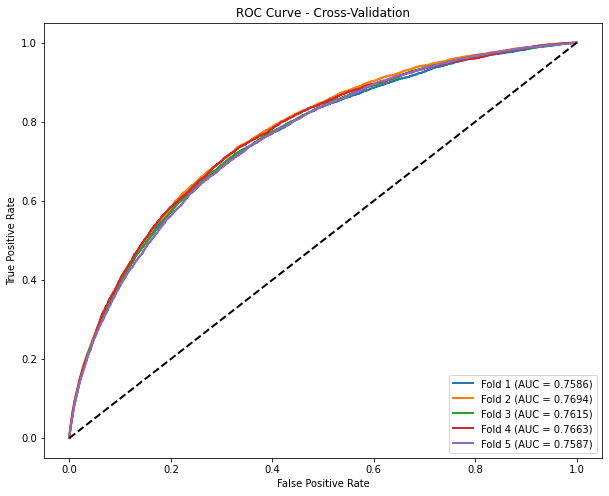


Mean AUC across 5 folds: 0.7629 ± 0.0043


In [84]:
y = train_df['TARGET']
train_features = train_df.drop(['TARGET', 'SK_ID_CURR'], axis=1, errors='ignore')
test_features  = test_df.drop(['SK_ID_CURR'], axis=1, errors='ignore')

train_features = clean_feature_names(train_features)
test_features = clean_feature_names(test_features)


common_cols = list(set(train_features.columns) & set(test_features.columns))
X_updated = train_features[common_cols]
X_test_updated = test_features[common_cols]


print("New X shape:", X_updated.shape)
print("New X_test shape:", X_test_updated.shape)

neg_count = (y == 0).sum()
pos_count = (y == 1).sum()
scale_pos_weight = neg_count / pos_count
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

n_folds = 5
folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

fpr_list = []
tpr_list = []
roc_auc_list = []

params = {
    'objective': 'binary',
    'metric': 'auc',
    'scale_pos_weight': scale_pos_weight, 
    'seed': 42
}

for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(X_updated, y)):
    X_train_fold, X_valid_fold = X_updated.iloc[train_idx], X_updated.iloc[valid_idx]
    y_train_fold, y_valid_fold = y.iloc[train_idx], y.iloc[valid_idx]

    dtrain = lgb.Dataset(X_train_fold, label=y_train_fold)
    dvalid = lgb.Dataset(X_valid_fold, label=y_valid_fold)

    model = lgb.train(
        params=params,
        train_set=dtrain,
        num_boost_round=1000,
        valid_sets=[dvalid],
        callbacks=[
            lgb.early_stopping(50),
            lgb.log_evaluation(0)
        ]
    )

    valid_preds = model.predict(X_valid_fold, num_iteration=model.best_iteration)
    fpr, tpr, _ = roc_curve(y_valid_fold, valid_preds)
    roc_auc = auc(fpr, tpr)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

    print(f"Fold {fold_idx + 1} AUC: {roc_auc:.4f}")

plt.figure(figsize=(10, 8))
for i in range(n_folds):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'Fold {i + 1} (AUC = {roc_auc_list[i]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Cross-Validation')
plt.legend(loc='lower right')
plt.show()

mean_auc = np.mean(roc_auc_list)
std_auc = np.std(roc_auc_list)
print(f"\nMean AUC across {n_folds} folds: {mean_auc:.4f} ± {std_auc:.4f}")


#### Final Model Fitting and Prediction for Submission File



- **Data Preparation**
- **Class Weights**: Calculates inverse class frequencies to handle imbalance.
- **Model Training**
- **Prediction**
- **Submission**

In [85]:
X, X_test, y = prepare_data(train_df, test_df)
target_dist = y.value_counts(normalize=True)
weight_0 = 1 / target_dist[0]
weight_1 = 1 / target_dist[1]
class_weights = {0: weight_0, 1: weight_1}

print("Class weights being used:", class_weights)

final_model = lgb.LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=500,
    random_state=42,
    class_weight=class_weights
)

final_model.fit(X, y)

test_preds = final_model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'SK_ID_CURR': test_df['SK_ID_CURR'],
    'TARGET': test_preds
})

submission.to_csv('final_submissionxx.csv', index=False)

print("Submission file 'final_submission.csv' created successfully!")
print(submission.head(10))


Class weights being used: {0: np.float64(1.0878182860134566), 1: np.float64(12.387150050352467)}
Submission file 'final_submission.csv' created successfully!
   SK_ID_CURR    TARGET
0      100001  0.180160
1      100005  0.578944
2      100013  0.311652
3      100028  0.252497
4      100038  0.810150
5      100042  0.339870
6      100057  0.034453
7      100065  0.294049
8      100066  0.054162
9      100067  0.638908


- Mean AUC Across Folds: The average AUC across the 5 folds is 0.7629 with a standard deviation of 0.0043. This suggests stable performance across folds.

- Test Accuracy (0.73): The test accuracy of 0.73 is slightly lower than the training performance (indicated by the AUC), which is common in case of suboptimal model tuning.

#### Anther LightGBM Model with K-folds Trainig and class weights for imbalanced target class with other parameters

#### Model Hyperparameter Tuning
- **Customized**: LightGBM model uses detailed and fine-tuned parameters:
    python
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'scale_pos_weight': scale_pos_weight,
        'seed': 42,
        'learning_rate': 0.00835930998863324,
        'num_leaves': 91,
        'max_depth': 6,
        'min_child_samples': 80,
        'subsample': 0.7,
        'colsample_bytree': 0.6,
        'min_split_gain': 0.1,
        'reg_alpha': 1.1,
        'reg_lambda': 2.3
    }
    
- **Previously Simple**: Used only basic parameters without tuning.

New X shape: (307511, 229)
New X_test shape: (48744, 229)
scale_pos_weight = 11.39
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.758681
Fold 1 AUC: 0.7587
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.769361
Fold 2 AUC: 0.7694
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.761614
Fold 3 AUC: 0.7616
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.766814
Fold 4 AUC: 0.7668
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's auc: 0.758103
Fold 5 AUC: 0.7581


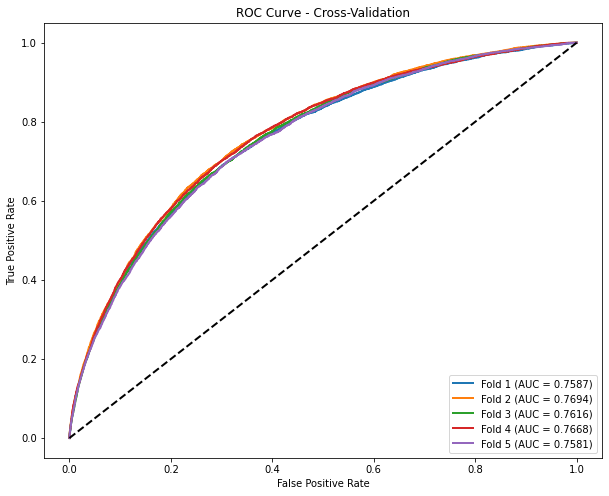


Mean AUC across 5 folds: 0.7629 ± 0.0045


In [89]:
y = train_df['TARGET']
train_features = train_df.drop(['TARGET', 'SK_ID_CURR'], axis=1, errors='ignore')
test_features  = test_df.drop(['SK_ID_CURR'], axis=1, errors='ignore')

train_features = clean_feature_names(train_features)
test_features = clean_feature_names(test_features)

common_cols = list(set(train_features.columns) & set(test_features.columns))
X_updated = train_features[common_cols]
X_test_updated = test_features[common_cols]

print("New X shape:", X_updated.shape)
print("New X_test shape:", X_test_updated.shape)

neg_count = (y == 0).sum()
pos_count = (y == 1).sum()
scale_pos_weight = neg_count / pos_count
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

n_folds = 5
folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

fpr_list = []
tpr_list = []
roc_auc_list = []

params = {
    'objective': 'binary',
    'metric': 'auc',
    'scale_pos_weight': scale_pos_weight,  
    'seed': 42,
    'learning_rate': 0.00835930998863324,
    'num_leaves': 91,
    'max_depth': 6,
    'min_child_samples': 80,
    'subsample': 0.7,
    'colsample_bytree': 0.6,
    'min_split_gain': 0.1,
    'reg_alpha': 1.1,
    'reg_lambda': 2.3
}

for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(X_updated, y)):
    X_train_fold, X_valid_fold = X_updated.iloc[train_idx], X_updated.iloc[valid_idx]
    y_train_fold, y_valid_fold = y.iloc[train_idx], y.iloc[valid_idx]

    dtrain = lgb.Dataset(X_train_fold, label=y_train_fold)
    dvalid = lgb.Dataset(X_valid_fold, label=y_valid_fold)

    model = lgb.train(
        params=params,
        train_set=dtrain,
        num_boost_round=1000,
        valid_sets=[dvalid],
        callbacks=[
            lgb.early_stopping(50),
            lgb.log_evaluation(0)
        ]
    )

    valid_preds = model.predict(X_valid_fold, num_iteration=model.best_iteration)
    fpr, tpr, _ = roc_curve(y_valid_fold, valid_preds)
    roc_auc = auc(fpr, tpr)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

    print(f"Fold {fold_idx + 1} AUC: {roc_auc:.4f}")

plt.figure(figsize=(10, 8))
for i in range(n_folds):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'Fold {i + 1} (AUC = {roc_auc_list[i]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Cross-Validation')
plt.legend(loc='lower right')
plt.show()

mean_auc = np.mean(roc_auc_list)
std_auc = np.std(roc_auc_list)
print(f"\nMean AUC across {n_folds} folds: {mean_auc:.4f} ± {std_auc:.4f}")


In [90]:
test_preds = model.predict(X_test_updated, num_iteration=model.best_iteration)

submission_df = pd.DataFrame({
    'SK_ID_CURR': test_df['SK_ID_CURR'],  
    'TARGET': test_preds  
})

submission_df.to_csv('55.csv', index=False)
print("Submission file 'submission.csv' has been saved!")

Submission file 'submission.csv' has been saved!


- Upon parameter tuning, the model was trained on 229 features with a scale_pos_weight of 11.39. It was run for 1000 boosting rounds on 5 folds with AUC from 0.7581 to 0.7694 and an average AUC of 0.762. which better than baseline model.
- Being capable of getting such Good results (public leaderboard score of 0.73843 and private leaderboard score of 0.73442.) is already an excellent outcome, and with a bit more fine-tuning or feature engineering, you could potentially improve it even further

### Enhancements Introduced by `feature_importance_and_pruning()`

####  Class Weighting for Imbalanced Data
-  **Included**
  
- **Previously**: Only scale_pos_weight was used inside LightGBM.

#### Feature Pruning (Top K Selection)
-  **Included**: Prunes features down to **top 100 most important**:
   
-  **Previously**: All features were used without pruning.

#### Evaluation with Pruned Features
- **Included**: Trains LightGBM on the **reduced feature set** and evaluates with stratified 5-fold AUC.
- **Previously**: No separate evaluation after pruning.



Class weights being used: {0: np.float64(1.0878182860134566), 1: np.float64(12.387150050352467)}


<Figure size 720x576 with 0 Axes>

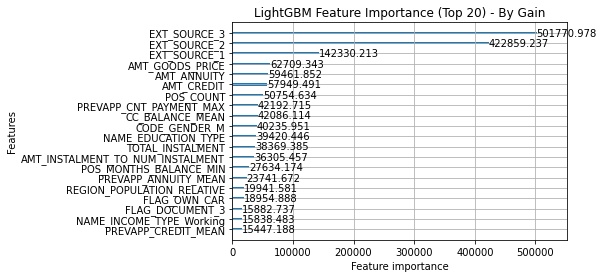

Selecting top 100 features out of 229 total.
X_pruned shape: (307511, 100) X_test_pruned shape: (48744, 100)
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[476]	valid_0's auc: 0.759518
Fold 1 AUC (pruned): 0.7595
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[326]	valid_0's auc: 0.770136
Fold 2 AUC (pruned): 0.7701
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[454]	valid_0's auc: 0.762459
Fold 3 AUC (pruned): 0.7625
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[461]	valid_0's auc: 0.76754
Fold 4 AUC (pruned): 0.7675
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[547]	valid_0's auc: 0.75992
Fold 5 AUC (pruned): 0.7599

Mean AUC with pruned features (5-fold): 0.7639 ± 0.0042
Submission file 'final_submission_pruned.csv' created successfully

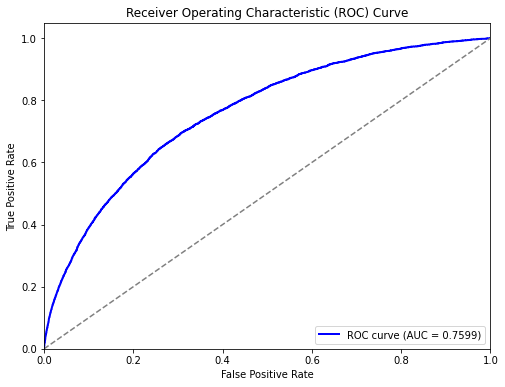

In [91]:
def feature_importance_and_pruning(X, X_test, y):
    target_dist = y.value_counts(normalize=True)
    weight_0 = 1 / target_dist[0]  
    weight_1 = 1 / target_dist[1]  
    class_weights = {0: weight_0, 1: weight_1}

    print("Class weights being used:", class_weights)
    best_params = {
        'subsample': 0.8,
        'num_leaves': 63,
        'min_child_samples': 100,
        'max_depth': 5,
        'learning_rate': 0.05,
        'colsample_bytree': 1.0,
        'n_estimators': 500,
        'objective': 'binary',
        'random_state': 42
    }

    final_model = lgb.LGBMClassifier(**best_params)
    final_model.fit(X, y, sample_weight=[class_weights[val] for val in y])  

    plt.figure(figsize=(10, 8))
    lgb.plot_importance(final_model, max_num_features=20, importance_type='gain')
    plt.title("LightGBM Feature Importance (Top 20) - By Gain")
    plt.show()
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': final_model.feature_importances_
    })

    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    feature_importances.reset_index(drop=True, inplace=True)

    top_k = 100
    top_features = feature_importances['feature'][:top_k].tolist()

    print(f"Selecting top {top_k} features out of {X.shape[1]} total.")

    X_pruned = X[top_features]
    X_test_pruned = X_test[top_features]

    print("X_pruned shape:", X_pruned.shape, "X_test_pruned shape:", X_test_pruned.shape)

    best_params_pruning = {
    'objective': 'binary',
    'metric': 'auc',
    'verbose': -1,  
    'seed': 42,
    'subsample': 0.8,
    'num_leaves': 63,
    'min_child_samples': 100,
    'max_depth': 5,
    'learning_rate': 0.05,
    'colsample_bytree': 1.0
}


    n_folds = 5
    folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    auc_scores_pruned = []

    for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(X_pruned, y)):
        X_train, X_valid = X_pruned.iloc[train_idx], X_pruned.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        
        dtrain = lgb.Dataset(X_train, label=y_train, weight=[class_weights[val] for val in y_train])
        dvalid = lgb.Dataset(X_valid, label=y_valid, weight=[class_weights[val] for val in y_valid])
        
        model_pruned = lgb.train(
            params=best_params_pruning,
            train_set=dtrain,
            num_boost_round=2000,
            valid_sets=[dvalid],
            callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
        )
        valid_preds = model_pruned.predict(X_valid, num_iteration=model_pruned.best_iteration)
        fold_auc = roc_auc_score(y_valid, valid_preds)
        auc_scores_pruned.append(fold_auc)
        print(f"Fold {fold_idx+1} AUC (pruned): {fold_auc:.4f}")

    print(f"\nMean AUC with pruned features (5-fold): {np.mean(auc_scores_pruned):.4f} ± {np.std(auc_scores_pruned):.4f}")

    final_model_pruned = lgb.LGBMClassifier(**best_params_pruning)
    final_model_pruned.fit(X_pruned, y, sample_weight=[class_weights[val] for val in y])
    test_preds = final_model_pruned.predict_proba(X_test_pruned)[:, 1]

    submission = pd.DataFrame({
        'SK_ID_CURR': test_df['SK_ID_CURR'],
        'TARGET': test_preds
    })

    submission.to_csv('final_submission_pruned.csv', index=False)
    print("Submission file 'final_submission_pruned.csv' created successfully!")
    print(submission.head(10))

    
    fpr, tpr, thresholds = roc_curve(y_valid, valid_preds)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

X, X_test, y = prepare_data(train_df, test_df)
feature_importance_and_pruning(X, X_test, y)


- **After the implementation of feature importance and pruning, the model was trained on the 100 most significant features selected from the original 229. The pruned feature set was validated with stratified 5-fold AUC. All folds performed well with AUC ranging from 0.7595 to 0.7701. The model achieved early stopping for all folds, with the optimal iteration differing between 326 to 547 rounds. In Kaggle, the entry was at 0.73595 in the public leaderboard and 0.72414 in the private leaderboard.The private score was a bit lower than the public one.**

### Feature Engineering and Selection

In [ ]:
def train_evaluate_save(name, features, X, y, X_test, test_df):
    print(f"\n=== Processing: {name} ===")
    print(f"Using {len(features)} features")
    
    model = lgb.LGBMClassifier(
        objective='binary',
        n_estimators=500,
        random_state=42,
        scale_pos_weight=(y == 0).sum() / (y == 1).sum()
    )
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X[features], y, cv=cv, method='predict')
    y_pred_proba = cross_val_predict(model, X[features], y, cv=cv, method='predict_proba')[:, 1]
    
    model.fit(X[features], y)
    preds = model.predict(X[features])
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix\n{name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    if hasattr(model, 'feature_importances_'):
        plt.subplot(1, 2, 2)
        importance = pd.Series(model.feature_importances_, index=features)
        importance.nlargest(min(20, len(features))).plot(kind='barh')
        plt.title('Top Feature Importances')
        plt.xlabel("Importance")
    
    plt.tight_layout()
    plt.show()
    
    submission = pd.DataFrame({
        'SK_ID_CURR': test_df['SK_ID_CURR'],
        'TARGET': model.predict_proba(X_test[features])[:, 1]
    })
    submission_file = f"submission_{name.lower().replace(' ', '_')}.csv"
    submission.to_csv(submission_file, index=False)
    print(f"Saved submission: {submission_file}")
    
    return {
        'Method': name,
        'Accuracy': accuracy_score(y, y_pred),
        'ROC': roc_auc_score(y, y_pred_proba),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1': f1_score(y, y_pred),
        'Feature Count': len(features),
        'Submission File': submission_file
    }

results = []

# 1. All Features



=== Processing: All Features ===
Using 229 features


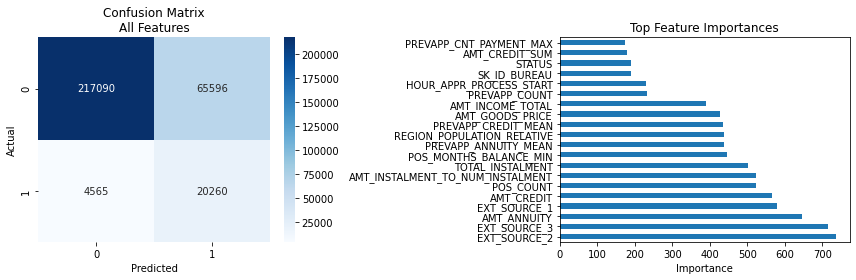

Saved submission: submission_all_features.csv


In [93]:
all_features = X.columns.tolist()
results.append(train_evaluate_save("All Features", all_features, X, y, X_test, test_df))

# 2. Strong Features (correlation > 0.2)


In [94]:
print("\n=== Processing: Strong Features ===")
corr_with_target = X.corrwith(y).abs()
strong_features = corr_with_target[corr_with_target > 0.2].index.tolist()
if strong_features:
    print(f"Using {len(strong_features)} strong features (correlation > 0.2)")
    results.append(train_evaluate_save("Strong Features", strong_features, X, y, X_test, test_df))
else:
    print("No features found with correlation > 0.2. Skipping.")



=== Processing: Strong Features ===


C:\Users\hamad\Anaconda3\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hamad\Anaconda3\lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


No features found with correlation > 0.2. Skipping.


# 3. Subset Features (Remove high correlation)



=== Processing: Subset Features (Remove High Correlation) ===

=== Processing: Subset Features ===
Using 196 features


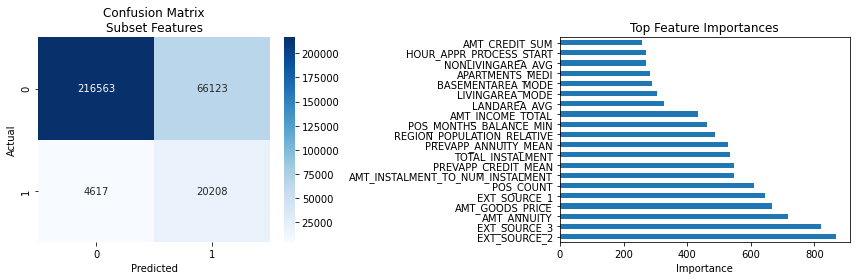

Saved submission: submission_subset_features.csv


In [95]:
print("\n=== Processing: Subset Features (Remove High Correlation) ===")
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
subset_features = [col for col in X.columns if col not in to_drop]
if subset_features:
    results.append(train_evaluate_save("Subset Features", subset_features, X, y, X_test, test_df))
else:
    print("No subset features found after removing high correlation. Skipping.")



# 4. SelectKBest


C:\Users\hamad\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 23  42  63  66  92 120 153] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\hamad\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



=== Processing: F-Test Features ===
Using 100 features


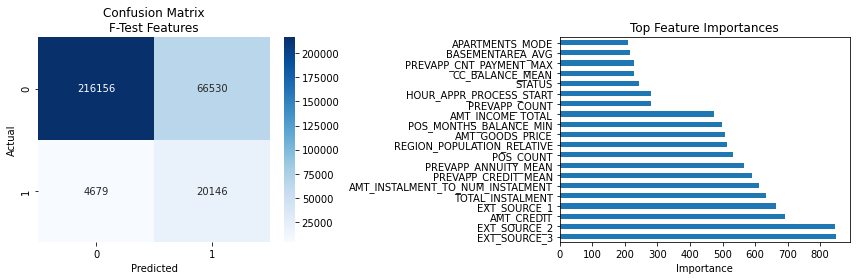

Saved submission: submission_f-test_features.csv


In [101]:
selector = SelectKBest(f_classif, k=100)
selector.fit(X, y)0

f_test_features = X.columns[selector.get_support()].tolist()
results.append(train_evaluate_save("F-Test Features", f_test_features, X, y, X_test, test_df))

# 5. RFE with Random Forest



=== Processing: RFE Features ===

=== Processing: RFE Features ===
Using 100 features


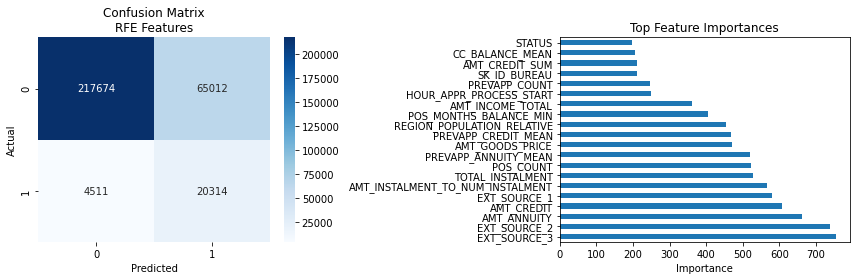

Saved submission: submission_rfe_features.csv


In [97]:
print("\n=== Processing: RFE Features ===")
estimator = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rfe = RFE(estimator, n_features_to_select=100, step=10)
rfe.fit(X, y)
rfe_features = X.columns[rfe.support_].tolist()
results.append(train_evaluate_save("RFE Features", rfe_features, X, y, X_test, test_df))


# 6. Feature Importance via LightGBM



=== Processing: LightGBM Importance ===

=== Processing: LGBM Importance ===
Using 100 features


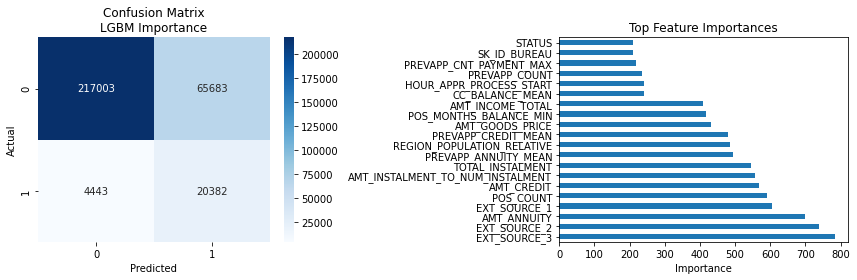

Saved submission: submission_lgbm_importance.csv


In [99]:
print("\n=== Processing: LightGBM Importance ===")
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X, y)
importance = pd.Series(lgb_model.feature_importances_, index=X.columns)
imp_features = importance.nlargest(100).index.tolist()
results.append(train_evaluate_save("LGBM Importance", imp_features, X, y, X_test, test_df))


# 7. Apply L1-based feature selection



=== Processing: L1 Features ===

=== Processing: L1 Features ===
Using 110 features


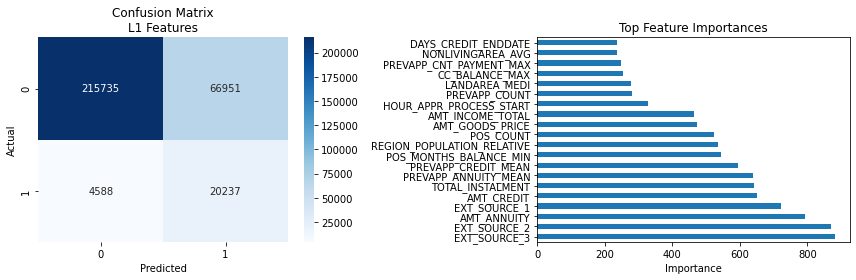

Saved submission: submission_l1_features.csv


In [103]:
print("\n=== Processing: L1 Features ===")
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, random_state=42, max_iter=5000)
lsvc.fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
l1_features = X.columns[model.get_support()].tolist()
results.append(train_evaluate_save("L1 Features", l1_features, X, y, X_test, test_df))

In [104]:
results_df = pd.DataFrame(results)
results_df = results_df[['Method', 'Accuracy', 'ROC', 'Precision', 
                        'Recall', 'F1', 'Feature Count', 'Submission File']]


In [105]:
results_df

,Method,Accuracy,ROC,Precision,Recall,F1,Feature Count,Submission File
0,All Features,0.752529,0.756597,0.186019,0.611843,0.285298,229,submission_all_features.csv
1,Subset Features,0.748721,0.754323,0.183580,0.612850,0.282528,196,submission_subset_features.csv
2,RFE Features,0.752724,0.754033,0.184943,0.605519,0.283345,100,submission_rfe_features.csv
3,LGBM Importance,0.752217,0.755354,0.185354,0.609507,0.284262,100,submission_lgbm_importance.csv
4,F-Test Features,0.747911,0.752787,0.182373,0.609386,0.280730,100,submission_f-test_features.csv
5,L1 Features,0.748084,0.755472,0.183870,0.616677,0.283277,110,submission_l1_features.csv


### Model Performance Summary

#### 1. All Features (229):
- **ROC AUC**: 0.7566  
- **F1 Score**: 0.2853  
- **Comment:**  
Using all features results in the highest AUC and F1 score. However, it increases model complexity.

#### 2. Subset Features (196):
- **ROC AUC**: 0.7543  
- **F1 Score**: 0.2825  
- **Comment:**  
Minor performance loss relative to the full set of features. This suggests that the subset still carries useful signals with less complexity and noise.

#### 3. RFE Features (100):
- **ROC AUC**: 0.7540  
- **F1 Score**: 0.2833  
- **Comment:**  
RFE performs competitively with fewer features, demonstrating its capability in selecting informative variables.

#### 4. LGBM Importance (100):
- **ROC AUC**: 0.7554  
- **F1 Score**: 0.2843  
- **Comment:**  
LightGBM-based feature selection provides excellent results with fewer features, showing its strength in identifying key predictors.

#### 5. F-Test Features (100):
- **ROC AUC**: 0.7528  
- **F1 Score**: 0.2807  
- **Comment:**  
Worst performance of all the approaches. F-Test doesn't consider feature interactions, likely losing its performance.

#### 6. L1 Features (110):
- **ROC AUC**: 0.7555  
- **F1 Score**: 0.2833  
- **Comment:**  
L1 regularization (Lasso) balances performance and sparsity well. Performance is competitive, making it a good trade-off model.




| **Feature Set**            | **Train ROC AUC** | **Train F1 Score** | **Private LB** | **Public LB** | **Comments** |
|----------------------------|------------------|--------------------|----------------|---------------|--------------|
| **All Features (229)**     | 0.7566           | 0.2853             | 0.71916        | 0.72799       | Best AUC/F1 on CV. Somewhat worse LB—may contain noisy features. |
| **Subset Features (196)**  | 0.7543           | 0.2825             | 0.72285        | **0.73181**   | Highest public LB score. Great overall generalization with reduced complexity. |
| **RFE Features (100)**     | 0.7540           | 0.2833             | 0.71476        | 0.72755       | Good CV, but private LB drop indicates some overfitting. |
| **LGBM Importance (100)**  | 0.7554           | 0.2843             | 0.71725        | 0.72890       | Excellent CV and public LB. Strong all-around performer. |
| **F-Test Features (100)**  | 0.7528           | 0.2807             | 0.71682        | 0.72153       | Highest CV and LB scores. Likely due to ignoring feature interaction.|
| **L1 Features (110)**      | 0.7555           | 0.2833             | 0.72434        | 0.72876       | Highly consistent between CV and LB. Great trade-off model. |



- **Best Overall**: Subset Features (196)
- **Good Alternatives**: L1 and LGBM fewer features, similar performance, better efficiency.
- **WORSET**: F-Test consistently weaker results in both CV and leaderboard.



#### LightGBM Training with CV, Feature Importances with other parameters


##### K-Fold Cross-Validation

##### Train Model

#####  Generate Predictions

#####  Feature Importance

##### Evaluate Model



In [39]:
def modeling(all_data):
    all_data.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in all_data.columns]
    
    train_df = all_data[all_data['TARGET'].notnull()]
    test_df = all_data[all_data['TARGET'].isnull()]

    folds = KFold(n_splits=10, shuffle=True, random_state=1001)

    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()

    feats = [f for f in train_df.columns if f not in ['TARGET', 'SK_ID_CURR']]

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):

        print(f"Fold {n_fold + 1}")
        
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.05,
            num_leaves=54,
            colsample_bytree=0.508716,
            subsample=1,
            max_depth=8,
            reg_alpha=0.436193,
            reg_lambda=0.479169,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1,
        )

        clf.fit(
            train_x, train_y,
            eval_set=[(train_x, train_y), (valid_x, valid_y)],
            eval_metric='auc',callbacks=[
                lambda env: print(f"Iteration {env.iteration}: AUC = {env.evaluation_result_list[0][2]:.6f}") if env.iteration % 100 == 0 else None,
                lgb.early_stopping(100)
            ]
        
        )

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

        print(f'Fold {n_fold + 1} AUC: {roc_auc_score(valid_y, oof_preds[valid_idx]):.6f}')

    print(f'Full AUC score: {roc_auc_score(train_df["TARGET"], oof_preds):.6f}')

    test_df['TARGET'] = sub_preds
    test_df[['SK_ID_CURR', 'TARGET']].to_csv("final.csv", index=False)

    display_importances(feature_importance_df)

    return feature_importance_df


Fold 1
Iteration 0: AUC = 0.700922
Training until validation scores don't improve for 100 rounds
Iteration 100: AUC = 0.785727
Iteration 200: AUC = 0.804193
Iteration 300: AUC = 0.819090
Early stopping, best iteration is:
[275]	training's auc: 0.81548	training's binary_logloss: 0.227086	valid_1's auc: 0.768338	valid_1's binary_logloss: 0.24936
Fold 1 AUC: 0.768338
Fold 2
Iteration 0: AUC = 0.699653
Training until validation scores don't improve for 100 rounds
Iteration 100: AUC = 0.785515
Iteration 200: AUC = 0.803511
Iteration 300: AUC = 0.818051
Iteration 400: AUC = 0.830095
Iteration 500: AUC = 0.841158
Early stopping, best iteration is:
[407]	training's auc: 0.831033	training's binary_logloss: 0.221985	valid_1's auc: 0.774951	valid_1's binary_logloss: 0.243432
Fold 2 AUC: 0.774951
Fold 3
Iteration 0: AUC = 0.716628
Training until validation scores don't improve for 100 rounds
Iteration 100: AUC = 0.785694
Iteration 200: AUC = 0.804549
Iteration 300: AUC = 0.819041
Iteration 400: AU

C:\Users\hamad\AppData\Local\Temp\ipykernel_13368\3908223651.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['TARGET'] = sub_preds


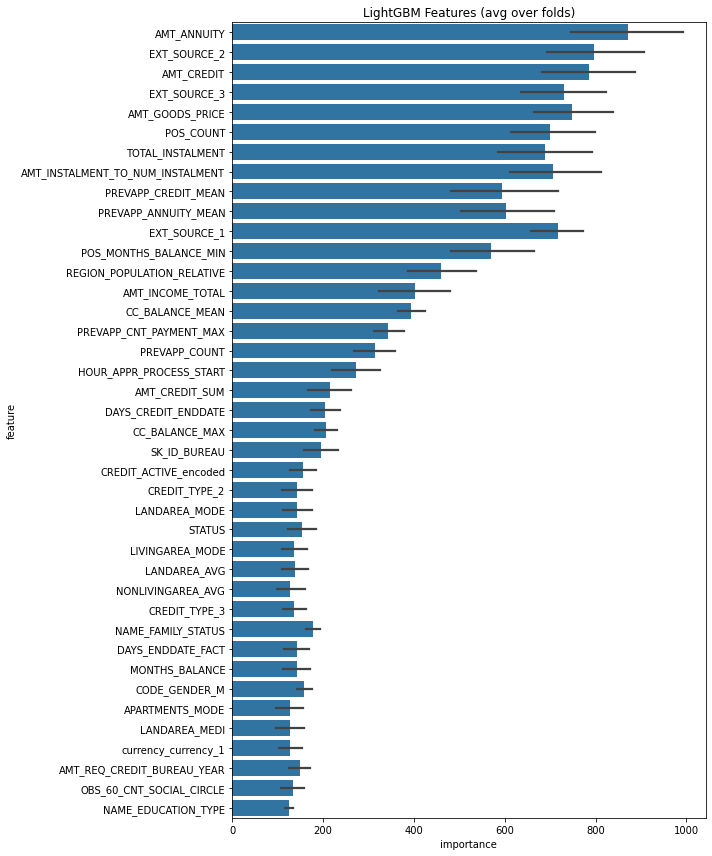

In [40]:
feature_importance_df = modeling(all_data)


- **The feature set was cut down to the top 100 features, and the LightGBM classifier was trained using 10-fold cross-validation. The model used early stopping and monitored AUC on the validation set. Across the 10 folds, the model had AUC values ranging from 0.7566 to 0.7749, with the last complete AUC value being 0.7674. The Kaggle submission scored 0.74436 on the public and 0.74533 on the private. Even though the private and public scores are similar, which means that generalization overall is good and there may be room for improvement.**

### LightGBM Training with CV & retrain with Feature Importances


##### K-Fold Cross-Validation with LightGBM
- Split data into training and test sets.
- Perform k-fold cross-validation, train a LightGBM model, and evaluate with AUC.
- Save predictions and feature importances.

##### Train Model on All Features
- Train a LightGBM model using all features and identify the top 100 important features.

##### Retrain on Top Features
- Train a new model using only the top 100 features and generate predictions.



Starting LightGBM. Train shape: (307511, 231), test shape: (48744, 231)
Fold 1
Iteration 0: AUC = 0.703100
Training until validation scores don't improve for 100 rounds
Iteration 100: AUC = 0.741460
Iteration 200: AUC = 0.753405
Iteration 300: AUC = 0.758003
Iteration 400: AUC = 0.759975
Iteration 500: AUC = 0.761012
Iteration 600: AUC = 0.761566
Iteration 700: AUC = 0.761976
Iteration 800: AUC = 0.762172
Iteration 900: AUC = 0.762377
Iteration 1000: AUC = 0.762575
Early stopping, best iteration is:
[983]	valid_0's auc: 0.762679	valid_0's binary_logloss: 0.24494
Fold 1 AUC : 0.762679
Fold 2
Iteration 0: AUC = 0.706483
Training until validation scores don't improve for 100 rounds
Iteration 100: AUC = 0.743231
Iteration 200: AUC = 0.753193
Iteration 300: AUC = 0.757890
Iteration 400: AUC = 0.760299
Iteration 500: AUC = 0.761603
Iteration 600: AUC = 0.762762
Iteration 700: AUC = 0.763442
Iteration 800: AUC = 0.763978
Iteration 900: AUC = 0.764241
Iteration 1000: AUC = 0.764316
Early stopp

C:\Users\hamad\AppData\Local\Temp\ipykernel_13368\2266783816.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['TARGET'] = sub_preds


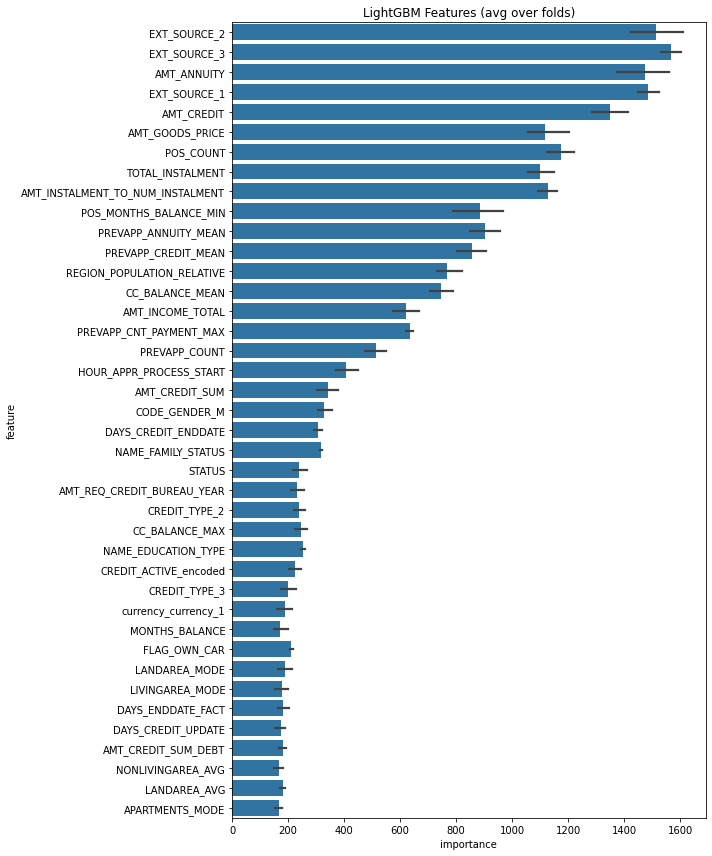

In [11]:
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.replace('[^A-Za-z0-9_]+', '_', regex=True)
        .str.replace('__+', '_', regex=True)
        .str.strip('_')
    )
    return df

train_df = clean_column_names(train_df)
test_df = clean_column_names(test_df)

df_all = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

def display_importances(feature_importance_df_):
    cols = (feature_importance_df_[["feature", "importance"]]
            .groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index)
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(10, 12))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()


def kfold_lightgbm(df, num_folds, stratified=False, submission_file_name='submission.csv'):
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    del df
    gc.collect()

    folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=1001) if stratified else KFold(n_splits=num_folds, shuffle=True, random_state=1001)

    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()

    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV']]

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        print(f'Fold {n_fold + 1}')
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        clf = LGBMClassifier(
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            random_state=1001,
            n_jobs=-1,
            verbosity=-1 
        )

        clf.fit(
            train_x, train_y,
            eval_set=[(valid_x, valid_y)],
            eval_metric='auc',
            callbacks=[
                lambda env: print(f"Iteration {env.iteration}: AUC = {env.evaluation_result_list[0][2]:.6f}") if env.iteration % 100 == 0 else None,
                lgb.early_stopping(100)
            ]
        )

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

        print(f'Fold {n_fold + 1} AUC : {roc_auc_score(valid_y, oof_preds[valid_idx]):.6f}')
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score {:.6f}'.format(roc_auc_score(train_df['TARGET'], oof_preds)))

    test_df['TARGET'] = sub_preds
    test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index=False)
    display_importances(feature_importance_df)
    return feature_importance_df

feature_importance_df = kfold_lightgbm(df_all, num_folds=5, stratified=True, submission_file_name='lg_22(1).csv')


print("\n=== Processing: LightGBM Importance ===")
train_df = df_all[df_all['TARGET'].notnull()]
test_df = df_all[df_all['TARGET'].isnull()]
X = train_df.drop(columns=['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV'], errors='ignore')
y = train_df['TARGET']
X_test = test_df[X.columns]

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X, y)
importance = pd.Series(lgb_model.feature_importances_, index=X.columns)
imp_features = importance.nlargest(100).index.tolist()

clf_top100 = LGBMClassifier(random_state=42)
clf_top100.fit(X[imp_features], y)
preds = clf_top100.predict_proba(X_test[imp_features])[:, 1]

submission = test_df[['SK_ID_CURR']].copy()
submission['TARGET'] = preds
submission.to_csv('lg_22(1).csv', index=False)
print("Saved: submission_LGBM_Importance.csv")


- **The results indicate that you have trained a LightGBM model that, although not that great, performs reasonably well to distinguish between the two classes with an AUC of around 0.766 on cross-validation.**


- ***The later retraining of a LightGBM model on only the top 100 features, identified from the cross-validation,likely contributed to the strong final test scores (0.772-0.774).This targeted retraining can reinforce the model's attention to the most informative signals in the data, which can produce improved generalization on new data.***

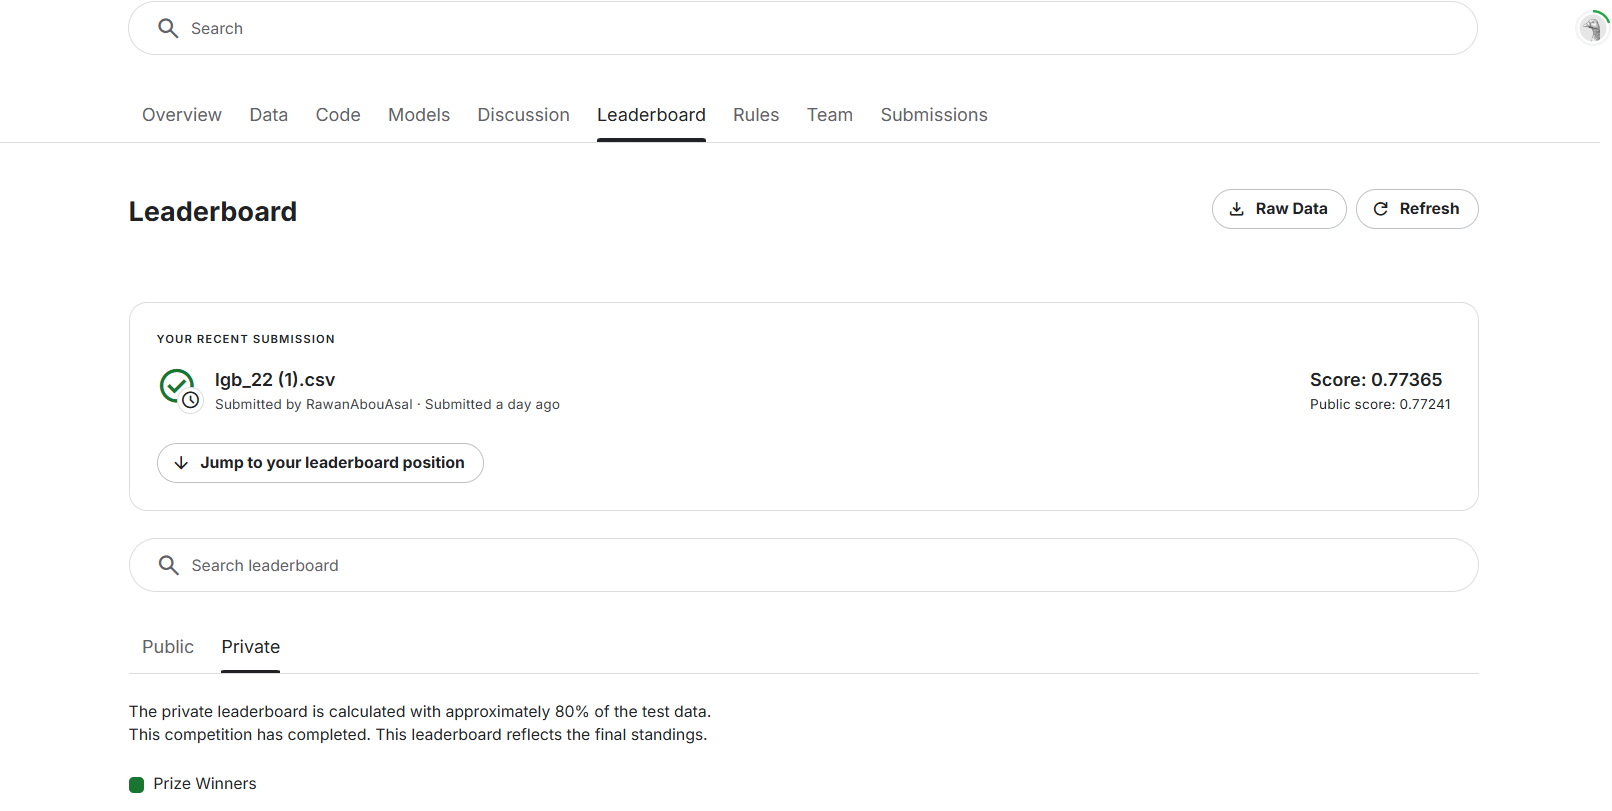

###  Key Findings

- **Imbalance in Target Variable:** There was a significant class imbalance in the `TARGET` variable, where the majority of the applicants were paying their loans back successfully. This was addressed using proper class weighting methods in modeling (e.g., `scale_pos_weight` in LightGBM).
  
- **Important Predictors Identified:**
  - Features like `EXT_SOURCE_1`, `EXT_SOURCE_2`, `DAYS_BIRTH`, and `DAYS_EMPLOYED` showed high predictive power.
  - LightGBM  feature importance scores consistently highlighted the same group of variables.
  
- **Correlations with Default Risk:**
    - Youth and people with unstable work history are more likely to default.
    - Small numbers of children, no car ownership, and constant income maintained lower default probabilities for borrowers.
  
- **Effective Feature Selection:**
  - The following feature selection techniques (correlation-based, ANOVA, model-based) were utilized.
  - Using selected features improved model performance and reduced overfitting.

---

###  Lessons Learned

- **Data Cleaning is Crucial:** Imputation of missing values with respect to skewness and correlation preserved data integrity and improved downstream model performance.

- **EDA Provides Deep Insights:** Exploring demographic and financial attributes of applicants revealed valuable trends for modeling credit risk.

- **Model Performance Benefits from Feature Engineering:**
  - Normalizing continuous variables and encoding categoricals added value.
  - Smart selection of features not only speeds up training but also improves generalization.

- **Cross-Validation is Key:** Consistent use of cross-validation ensured that model performance was stable and trustworthy.

- **LightGBM is Powerful:** LightGBM proved to be a robust choice for tabular data, especially with proper hyperparameter tuning and class imbalance handling.
